In [1]:
%load_ext dotenv
%dotenv

In [2]:
from langgraph.graph import START, END , StateGraph
from typing_extensions import TypedDict
from langchain_openai.chat_models import ChatOpenAI
from langchain_core.messages import HumanMessage, BaseMessage
from langchain_core.runnables import Runnable
from collections.abc import Sequence

In [3]:
class State(TypedDict):
    messages: Sequence[BaseMessage]

In [8]:
state = State(messages = [HumanMessage("Could you tell me about virat kohli??")])

In [9]:
state


{'messages': [HumanMessage(content='Could you tell me about virat kohli??', additional_kwargs={}, response_metadata={})]}

In [10]:
state["messages"][0].pretty_print()

================================ Human Message =================================

Could you tell me about virat kohli??


In [12]:
import os
os.environ["OPENAI_API_KEY"] = "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"

In [13]:
import openai
openai.api_key = os.getenv("OPENAI_API_KEY")

In [16]:
os.environ["OPENAI_API_BASE"] = "https://api.groq.com/openai/v1"
chat = ChatOpenAI(
    model_name="llama3-70b-8192", 
    model_kwargs={"seed": 365},
    temperature=0,
    max_completion_tokens=100)

C:\Users\hp\.conda\envs\langgraph_env\Lib\site-packages\IPython\core\interactiveshell.py:3639: UserWarning: Parameters {'seed'} should be specified explicitly. Instead they were passed in as part of `model_kwargs` parameter.
  if await self.run_code(code, result, async_=asy):


In [17]:
response = chat.invoke(state["messages"])

In [18]:
response

AIMessage(content="Virat Kohli! One of the most successful and dominant cricketers of our time. Here's a brief overview of his career and achievements:\n\n**Early Life and Career**\n\nVirat Kohli was born on November 5, 1988, in Delhi, India. He started playing cricket at a young age and was part of the Delhi Under-15 team. He made his first-class debut for Delhi in 2006 and quickly rose through the ranks.\n\n**International Career**\n\nKoh", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 100, 'prompt_tokens': 21, 'total_tokens': 121, 'completion_tokens_details': None, 'prompt_tokens_details': None, 'queue_time': 0.057806586, 'prompt_time': 0.000352454, 'completion_time': 0.36586122, 'total_time': 0.366213674}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'id': 'chatcmpl-682825ed-6377-4100-aaf6-6973221ff976', 'service_tier': None, 'finish_reason': 'length', 'logprobs': None}, id='run--bac13999-02fe-4f6c-82b7-b8a88

In [20]:
response.pretty_print()

================================== Ai Message ==================================

Virat Kohli! One of the most successful and dominant cricketers of our time. Here's a brief overview of his career and achievements:

**Early Life and Career**

Virat Kohli was born on November 5, 1988, in Delhi, India. He started playing cricket at a young age and was part of the Delhi Under-15 team. He made his first-class debut for Delhi in 2006 and quickly rose through the ranks.

**International Career**

Koh


In [22]:
def chatbot(state:State) -> State:
    print(f"\n----> ENTERING CHATBOT:")
    response = chat.invoke(state["messages"])
    response.pretty_print()
    return State(messages = [response])

In [23]:
chatbot(state)


----> ENTERING CHATBOT:
================================== Ai Message ==================================

Virat Kohli! One of the most successful and dominant cricketers of our time. Here's a brief overview of his career and achievements:

**Early Life and Career**

Virat Kohli was born on November 5, 1988, in Delhi, India. He started playing cricket at a young age and was part of the Delhi Under-15 team. He made his first-class debut for Delhi in 2006 and quickly rose through the ranks.

**International Career**

Koh


{'messages': [AIMessage(content="Virat Kohli! One of the most successful and dominant cricketers of our time. Here's a brief overview of his career and achievements:\n\n**Early Life and Career**\n\nVirat Kohli was born on November 5, 1988, in Delhi, India. He started playing cricket at a young age and was part of the Delhi Under-15 team. He made his first-class debut for Delhi in 2006 and quickly rose through the ranks.\n\n**International Career**\n\nKoh", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 100, 'prompt_tokens': 21, 'total_tokens': 121, 'completion_tokens_details': None, 'prompt_tokens_details': None, 'queue_time': 0.053956661, 'prompt_time': 0.000634389, 'completion_time': 0.357273481, 'total_time': 0.35790787}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'id': 'chatcmpl-8bedf110-c9a5-43c1-9002-769b1d4a139a', 'service_tier': None, 'finish_reason': 'length', 'logprobs': None}, id='run--0879ad9c-7a53-4

In [24]:
graph = StateGraph(State)

In [25]:
graph.add_node("chatbot",chatbot)
graph.add_edge(START, "chatbot")
graph.add_edge("chatbot", END)

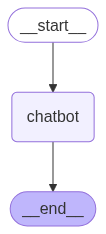

In [26]:
graph.compile()

In [27]:
graph.compile().invoke(state)


----> ENTERING CHATBOT:
================================== Ai Message ==================================

Virat Kohli! One of the most successful and dominant cricketers of our time. Here's a brief overview of his career and achievements:

**Early Life and Career**

Virat Kohli was born on November 5, 1988, in Delhi, India. He started playing cricket at a young age and was part of the Delhi Under-15 team. He made his first-class debut for Delhi in 2006 and quickly rose through the ranks.

**International Career**

Koh


{'messages': [AIMessage(content="Virat Kohli! One of the most successful and dominant cricketers of our time. Here's a brief overview of his career and achievements:\n\n**Early Life and Career**\n\nVirat Kohli was born on November 5, 1988, in Delhi, India. He started playing cricket at a young age and was part of the Delhi Under-15 team. He made his first-class debut for Delhi in 2006 and quickly rose through the ranks.\n\n**International Career**\n\nKoh", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 100, 'prompt_tokens': 21, 'total_tokens': 121, 'completion_tokens_details': None, 'prompt_tokens_details': None, 'queue_time': 0.057841855000000005, 'prompt_time': 0.000338594, 'completion_time': 0.352006642, 'total_time': 0.352345236}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'id': 'chatcmpl-998f03cc-2655-4dfc-bcf7-73c7d8215fde', 'service_tier': None, 'finish_reason': 'length', 'logprobs': None}, id='run--f8100

In [29]:
from typing import Literal

In [30]:
def ask_question(state:State) -> State:
    print(f"\n----> ENTERING CHATBOT:")
    print("WHAT IS YOUR QUESTION??")
    return State(messages = [HumanMessage(input())])

In [31]:
ask_question(State(messages = []))


----> ENTERING CHATBOT:
WHAT IS YOUR QUESTION??


 tell me about MS dhoni


{'messages': [HumanMessage(content='tell me about MS dhoni', additional_kwargs={}, response_metadata={})]}

In [32]:
def ask_another_question(state:State) -> State:
    print(f"\n----> ENTERING CHATBOT:")
    print("DO YOU HAVE ANY OTHER QUESTIONS (YES/NO)??")
    return State(messages = [HumanMessage(input())])

In [34]:
ask_another_question(State(messages = []))


----> ENTERING CHATBOT:
DO YOU HAVE ANY OTHER QUESTIONS (YES/NO)??


 yes


{'messages': [HumanMessage(content='yes', additional_kwargs={}, response_metadata={})]}

ROUTING FUNCTIONS

In [36]:
def routing_function(state: State)-> str:

    if state["messages"][0].content == "yes":
        return "ask_question"
    else:
        return "__end__"

In [74]:
graph = StateGraph(State)

In [75]:
graph.add_node("ask_question", ask_question)
graph.add_node("chatbot", chatbot)
graph.add_node("ask_another_question", ask_another_question)

graph.add_edge(START,"ask_question")
graph.add_edge("ask_question", "chatbot")
graph.add_edge("chatbot", "ask_another_question")
graph.add_conditional_edges(
    source="ask_another_question",
    path=routing_function
)


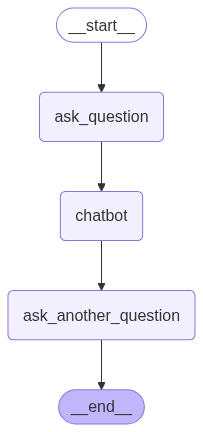

In [76]:
complied = graph.compile()
complied

In [77]:
complied.invoke(State(messages = []))


----> ENTERING CHATBOT:
WHAT IS YOUR QUESTION??


 tell me about ms dhoni



----> ENTERING CHATBOT:
================================== Ai Message ==================================

Mahendra Singh Dhoni, commonly known as MS Dhoni, is a former Indian international cricketer who served as the captain of the Indian national team in all formats of the game. He is widely regarded as one of the greatest wicket-keeper-batsmen and captains in the history of cricket.

Early Life and Career:

Dhoni was born on July 7, 1981, in Ranchi, Bihar (now Jharkhand), India. He was a goalkeeper in

----> ENTERING CHATBOT:
DO YOU HAVE ANY OTHER QUESTIONS (YES/NO)??


 yes



----> ENTERING CHATBOT:
WHAT IS YOUR QUESTION??


 tell me about virat kohli



----> ENTERING CHATBOT:
================================== Ai Message ==================================

Virat Kohli!

Virat Kohli is an Indian cricketer and the current captain of the India national team. He is widely regarded as one of the greatest batsmen of all time, and is often considered the best batsman of his generation.

Here are some interesting facts about Virat Kohli:

**Early Life and Career**

* Born on November 5, 1988, in Delhi, India
* Started playing cricket at the age of 9
* Represented Delhi

----> ENTERING CHATBOT:
DO YOU HAVE ANY OTHER QUESTIONS (YES/NO)??


 no


{'messages': [HumanMessage(content='no', additional_kwargs={}, response_metadata={})]}